In [1]:
%run Latex_macros.ipynb

<IPython.core.display.Latex object>

In [2]:
# My standard magic !  You will see this in almost all my notebooks.

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Reload all modules imported with %aimport
%load_ext autoreload
%autoreload 1

%matplotlib inline

In [3]:
import numpy as np
import os

import matplotlib.pyplot as plt

import class_helper
%aimport class_helper

lsh = class_helper.LinearSep_Helper()

# Classification

How do we predict a target that is a categorical rather than a number (as in regression) ?

To be concrete: we consider the *Binary Classification* task
- two classes (categories) 
- which we refer to as Positive and Negative
- encoded numerically as 1 and 0
- plotted as Green and Red points

Consider examples with a single feature.

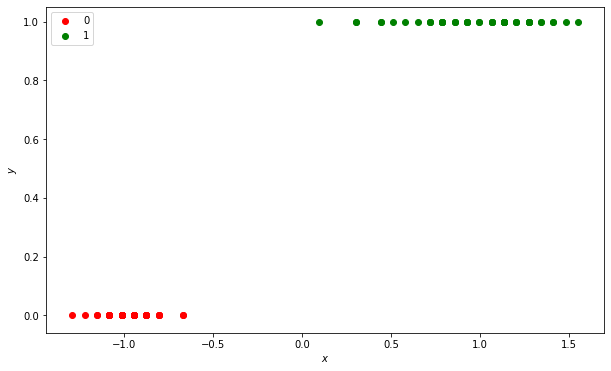

In [4]:
X_ls, y_ls = lsh.load_iris()

fig, ax = plt.subplots(figsize=(10,6))
_= lsh.plot_y_vs_x(ax, X_ls[:,0], y_ls)


As you can see, fitting a straight line will not do, so straight forward Linear Regression won't suffice.

There is a function, the *sigmoid*, that has the right shape:

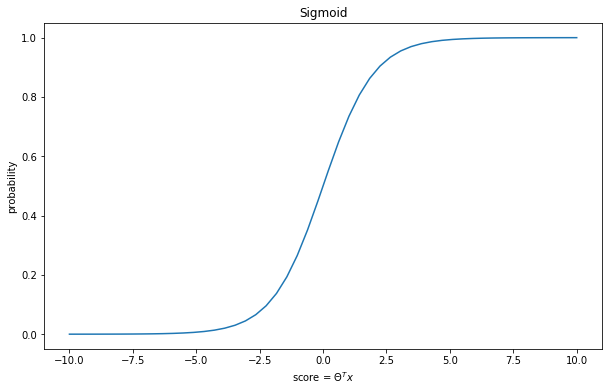

In [5]:
fig, ax = plt.subplots(figsize=(10,6))
_= lsh.plot_sigmoid(ax)

This is clearly not linear either, but we will adapt Linear Regression to this functional form.

Here is a example with two features.


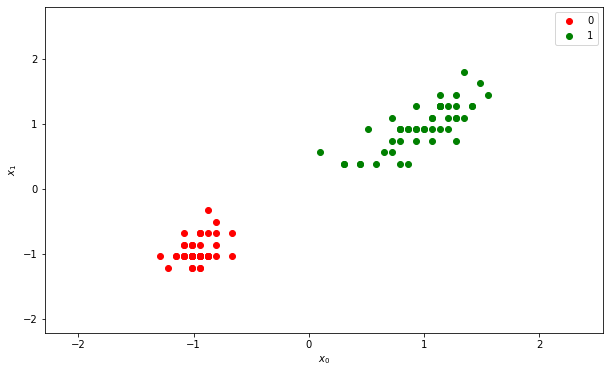

In [6]:
clf_ls = lsh.fit_LR(X_ls,y_ls)
fig, ax = plt.subplots(figsize=(10,6))
_= lsh.plot(ax, clf_ls, X_ls, y_ls, draw_boundary=False, scores=np.array([]))

Is it possible to adapt the Regression task for Classification ?

An obvious idea:
- Use the features $\x^\ip$ to compute a "score" (*logit*) $\hat{s}^\ip$
- Compare the predicted score to a threshold
- Predict Positive if the score exceeds the threshold; Negative otherwise

$$
\hat{y}^\ip = 
\left\{
    {
    \begin{array}{lll}
     \text{Negative} & \textrm{if } \hat{s}^\ip   < 0  &  \\
      \text{Positive}& \textrm{if } \hat{s}^\ip \ge 0  
    \end{array}
    }
\right.
$$

If the score has the form of a Linear Regression
$$s(\x) = \Theta^T \x
$$
then  we get something like this


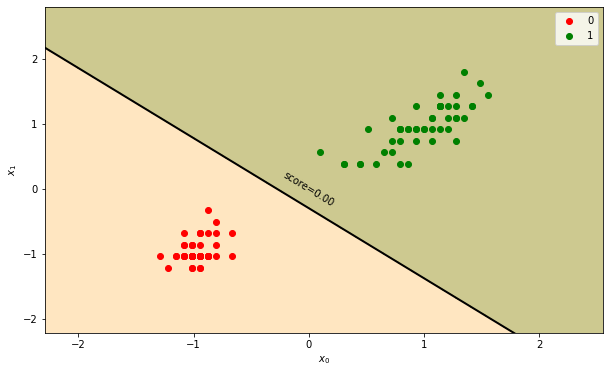

In [7]:
fig, ax = plt.subplots(figsize=(10,6))
_= lsh.plot(ax, clf_ls, X_ls, y_ls, draw_prob=False)

That is: the score $s(\x)$
- is linear in features $\x$
- separates Positive from Negative examples
    - Examples $(\x_0, \x_1)$ withs non-negative scores (i.e, points above the line) get classified as Positive
    - Examples $(\x_0, \x_1)$ withs negative scores (i.e, points below the line) get classified as Negative

If we can successfully classify by this method, the dataset set is *linearly separable*

A classifier for linearly separable data fits a hyperplane (e.g., the line $\hat{s} = 0$)
to the training data such that 
- examples lying above the plane are classified as Positive
- examples lying below the plane are classified as Negative

$$
s = \Theta^T \x  
$$

Can be interpretted as
- using template matching on the features $\x$ to produce a "score" $s = \Theta^T \x$


## Transforming Binary Classification into Linear Regression

How do we fit the scoring function ?

We adapt Linear Regression.

Let's reinterpret the targets/labels $\y^\ip$ as a probability $p^\ip$
$$
p^\ip = \pr{\y^\ip = \text{Positive} \; | \; \x^\ip }
$$


So 
- $\y^\ip = \text{Positive}$ is equivalent to $p^\ip =1$:  the target for example $i$ is Positive with 100% probabiity 
- $\y^\ip = \text{Negative}$ is equivalent to $p^\ip =0$:  the target for example $i$ is Positive with 0% (i.e., is Negative(


So the predicted score $\hat{s}^\ip$ being greater than a threshold (e.g. $0$) corresponds to 
$\hat{p}^\ip = 1$.

We can go further: map $\hat{s}^\ip$, which is continuous, into a continuous probability $\hat{p}^\ip \in [0,1]$.

The *Logistic Function* $\sigma(s)$ transforms a number  $s$ (e.g., score) into a probability

$$
\hat{p} = \sigma(s)  ={1 \over { 1 + e^{-s}} }
$$


Let's plot the logistic function to gain some intuition:

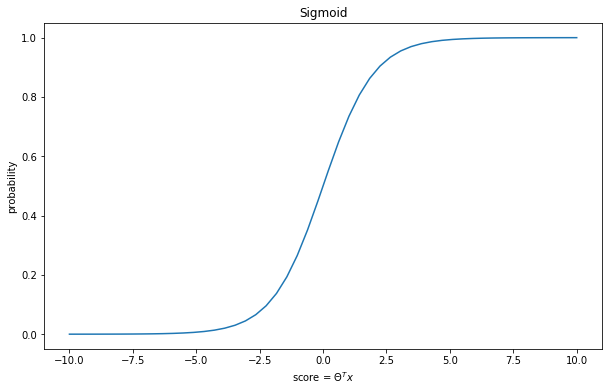

In [8]:
fig, ax = plt.subplots(figsize=(10,6))
_= lsh.plot_sigmoid(ax)


As you can see, it acts almost like a binary "switch"
- range is mostly 0 or 1

So this function creates a sharp boundary (measured in probability).

Now that we can convert between scores and probabilities
the following two forms of classification are equivalent

$$
\hat{y}^\ip = 
\left\{
    {
    \begin{array}{lll}
     \text{Negative} & \textrm{if } \hat{s}^\ip   < 0  &  \\
      \text{Positive}& \textrm{if } \hat{s}^\ip \ge 0  
    \end{array}
    }
\right.
$$


$$
\hat{y}^\ip = 
\left\{
    {
    \begin{array}{lll}
     \text{Negative} & \textrm{if } \hat{p}^\ip   < 0.5    \\
     \text{Positive} & \textrm{if } \hat{p}^\ip \ge 0.5   
    \end{array}
    }
\right.
$$
(because $\sigma(0) = 0.5$)

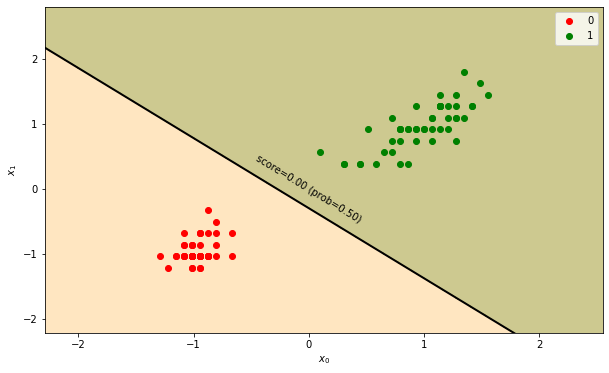

In [9]:
fig, ax = plt.subplots(figsize=(10,6))
_= lsh.plot(ax, clf_ls, X_ls, y_ls)

One can see the relationship between score and probability by looking at lines of constant score/probability.

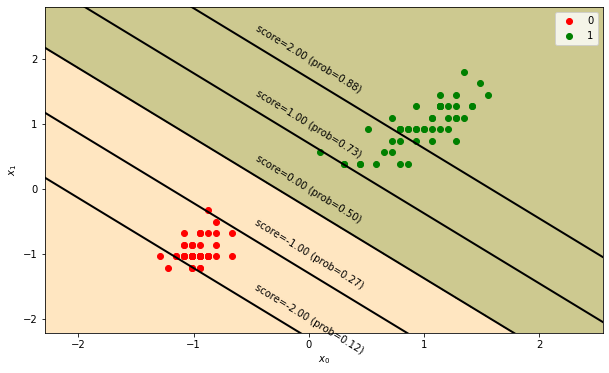

In [10]:
fig, ax = plt.subplots(figsize=(10,6))
_= lsh.plot(ax, clf_ls, X_ls, y_ls, scores = np.arange(-2, 3,1))

fig.savefig(os.path.join("/tmp",'class_overview_prob_lines.jpg') ) 

- Increasingly positive scores result in increasing probability of Positive
- Increasingly negative scores result in decreasing probability of Positive (and hence increasing probability of Negative)

When the score is infinite, the probability becomes 100% (positive infinity) or 0% (negative infinity)

# Logistic Regression

Because we use the Logistic function to map scores to probabilities, this method is called *Logistic Regression*.

To recap:
$$
\begin{array}[lll]\\
s & = & \Theta^T \x \\
\hat{p} & = & \sigma(s) \\
\end{array}
$$

$$
\hat{y}^\ip = 
\left\{
    {
    \begin{array}{lll}
     \text{Negative} & \textrm{if } \hat{p}^\ip   < 0.5    \\
     \text{Positive} & \textrm{if } \hat{p}^\ip \ge 0.5   
    \end{array}
    }
\right.
$$



**Preview**

The expression for $\hat{p}$
$$
\hat{p} = \sigma( \Theta^T \x)
$$

which involves
- template matching of features versus template ($\Theta$)
- convert the score into a probability with the sigmoid function

will reappear in the Deep Learning part of the course.

Of all the functions to "squeeze" score $s$ into the range $[0,1]$, why choose the Logistic Function ?

Let's invert the relationship induced by the Logistic Function
$$
\hat{p} = \sigma(s)
$$
between probability $\hat{p}$ and $s$

$$
\begin{array}[llll]\\
\frac{\hat{p}}{1 - \hat{p}} & = & \frac{ {1 \over { 1 + e^{-s}} }}{ 1 - {1 \over { 1 + e^{-s} }}} \\
& = & \frac{1 \over { 1 + e^{-s}} }{e^{-s} \over { 1 + e^{-s}} } \\
& = & e^{s} \\
\log_e{\frac{\hat{p}}{1 - \hat{p}}} & = & s
\end{array}
$$

So, using the logistic function to compute $\hat{p}$ results in

$$
\log_e{\frac{\hat{p}}{1 - \hat{p}}} = \Theta^T \x
$$

The above equation has the form of Linear Regression where target $\y$ has been transformed
to

$$
\log_e{\frac{\hat{p}}{1 - \hat{p}}} 
$$

The term $\frac{\hat{p}}{1 - \hat{p}}$ is called the *odds* (of being Positive)
so the dependent variable is the *log odds*.

We have thus transformed Binary Classification into Linear Regression.

This introduction glosses over several problems, which we will subsequently address
- the log odds is positive infinity when $p = 1$
- the log odds is negative infinity when $p = 0$

This means that MSE can't be used as a Loss Function for fitting since some residuals are infinite.

In [11]:
print("Done !")

Done !
